In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import NearMiss

In [2]:
data = pd.read_csv("NYPD_Shooting_Incident_Data__Historic_.csv")
data = data.set_index("INCIDENT_KEY")
data["PRECINCT"] = data["PRECINCT"].apply(str)
data.head()

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
INCIDENT_KEY,,,,,,,,,,,,,,,,,,
74146165,08/14/2010,3:11:00,QUEENS,113,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1046573,183057,40.668915,-73.775341,POINT (-73.77534099699994 40.66891477200004)
66928846,10/17/2009,18:03:00,BROOKLYN,67,0.0,NaN,True,NaN,NaN,NaN,45-64,M,BLACK,1003313,176413,40.650877,-73.931302,POINT (-73.93130224699998 40.65087729100002)
29114164,05/18/2007,23:00:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1016292,176228,40.650332,-73.884529,POINT (-73.884529479 40.65033205800006)
85180336,06/09/2012,17:15:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1005597,188673,40.684523,-73.923032,POINT (-73.92303235699995 40.68452304300007)
73405770,06/27/2010,4:14:00,BRONX,47,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1023551,263366,40.889474,-73.857860,POINT (-73.85786021699995 40.88947350500007)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21626 entries, 74146165 to 193694862
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   OCCUR_DATE               21626 non-null  object 
 1   OCCUR_TIME               21626 non-null  object 
 2   BORO                     21626 non-null  object 
 3   PRECINCT                 21626 non-null  object 
 4   JURISDICTION_CODE        21624 non-null  float64
 5   LOCATION_DESC            9265 non-null   object 
 6   STATISTICAL_MURDER_FLAG  21626 non-null  bool   
 7   PERP_AGE_GROUP           14321 non-null  object 
 8   PERP_SEX                 14355 non-null  object 
 9   PERP_RACE                14355 non-null  object 
 10  VIC_AGE_GROUP            21626 non-null  object 
 11  VIC_SEX                  21626 non-null  object 
 12  VIC_RACE                 21626 non-null  object 
 13  X_COORD_CD               21626 non-null  object 
 14  Y_COORD_CD      

In [4]:
print("Checking for null values")
print(data.isnull().sum())

Checking for null values
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
PRECINCT                       0
JURISDICTION_CODE              2
LOCATION_DESC              12361
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              7305
PERP_SEX                    7271
PERP_RACE                   7271
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
Lon_Lat                        0
dtype: int64


In [5]:
data["JURISDICTION_CODE"].value_counts()

JURISDICTION_CODE
0.0    18064
2.0     3510
1.0       50
Name: count, dtype: int64

In [6]:
data["MONTH"] = data["OCCUR_DATE"].str.split("/", expand=True)[0]
data.head()

,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,MONTH
INCIDENT_KEY,,,,,,,,,,,,,,,,,,,
74146165,08/14/2010,3:11:00,QUEENS,113,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1046573,183057,40.668915,-73.775341,POINT (-73.77534099699994 40.66891477200004),08
66928846,10/17/2009,18:03:00,BROOKLYN,67,0.0,NaN,True,NaN,NaN,NaN,45-64,M,BLACK,1003313,176413,40.650877,-73.931302,POINT (-73.93130224699998 40.65087729100002),10
29114164,05/18/2007,23:00:00,BROOKLYN,75,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1016292,176228,40.650332,-73.884529,POINT (-73.884529479 40.65033205800006),05
85180336,06/09/2012,17:15:00,BROOKLYN,81,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1005597,188673,40.684523,-73.923032,POINT (-73.92303235699995 40.68452304300007),06
73405770,06/27/2010,4:14:00,BRONX,47,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1023551,263366,40.889474,-73.857860,POINT (-73.85786021699995 40.88947350500007),06


In [7]:
columns_to_drop = ["OCCUR_DATE", "JURISDICTION_CODE", "LOCATION_DESC", "PERP_AGE_GROUP", "PERP_SEX", "PERP_RACE",
                   "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude", "Lon_Lat"]
data = data.drop(columns=columns_to_drop)
data.head()

,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH
INCIDENT_KEY,,,,,,,,
74146165,3:11:00,QUEENS,113,False,25-44,M,BLACK,08
66928846,18:03:00,BROOKLYN,67,True,45-64,M,BLACK,10
29114164,23:00:00,BROOKLYN,75,False,25-44,M,BLACK,05
85180336,17:15:00,BROOKLYN,81,False,25-44,M,BLACK,06
73405770,4:14:00,BRONX,47,False,25-44,M,BLACK,06


In [8]:
def categorize_time(time):
    hour = int(time.split(":")[0])
    if hour in range(0,6):
        return "EARLY MORNING"
    elif hour in range(6,12):
        return "MORNING"
    elif hour in range(12,18):
        return "AFTERNOON"
    elif hour in range(18,24):
        return "NIGHT"
    else:
        return None

data["OCCUR_TIME"] = data["OCCUR_TIME"].apply(categorize_time)
data.head()

,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH
INCIDENT_KEY,,,,,,,,
74146165,EARLY MORNING,QUEENS,113,False,25-44,M,BLACK,08
66928846,NIGHT,BROOKLYN,67,True,45-64,M,BLACK,10
29114164,NIGHT,BROOKLYN,75,False,25-44,M,BLACK,05
85180336,AFTERNOON,BROOKLYN,81,False,25-44,M,BLACK,06
73405770,EARLY MORNING,BRONX,47,False,25-44,M,BLACK,06


### Ensuring Protected Characteristic to be used has just 2 entries

In [9]:
def filter_data(df, column, values):
    return df[~df[column].isin(values)]

### RACE

In [10]:
data["VIC_RACE"].value_counts()

VIC_RACE
BLACK                             15470
WHITE HISPANIC                     3105
BLACK HISPANIC                     2085
WHITE                               578
ASIAN / PACIFIC ISLANDER            286
UNKNOWN                              93
AMERICAN INDIAN/ALASKAN NATIVE        9
Name: count, dtype: int64

In [11]:
race_data = filter_data(data, "VIC_RACE", ["ASIAN / PACIFIC ISLANDER", "AMERICAN INDIAN/ALASKAN NATIVE", "UNKNOWN"])
race_data["VIC_RACE"].value_counts()

VIC_RACE
BLACK             15470
WHITE HISPANIC     3105
BLACK HISPANIC     2085
WHITE               578
Name: count, dtype: int64

In [12]:
race_data.loc[:, "VIC_RACE"] = race_data["VIC_RACE"].replace({"BLACK HISPANIC": "BLACK", "WHITE HISPANIC": "WHITE"})
race_data["VIC_RACE"].value_counts()

VIC_RACE
BLACK    17555
WHITE     3683
Name: count, dtype: int64

### SEX

In [13]:
data["VIC_SEX"].value_counts()

VIC_SEX
M    19615
F     1999
U       12
Name: count, dtype: int64

In [14]:
sex_data = filter_data(data, "VIC_SEX", ["U"])
sex_data["VIC_SEX"].value_counts()

VIC_SEX
M    19615
F     1999
Name: count, dtype: int64

### AGE GROUP

In [15]:
data["VIC_AGE_GROUP"].value_counts()

VIC_AGE_GROUP
25-44      9228
18-24      8426
<18        2391
45-64      1381
65+         142
UNKNOWN      58
Name: count, dtype: int64

In [16]:
age_data = filter_data(data, "VIC_AGE_GROUP", ["UNKNOWN"])
age_data["VIC_AGE_GROUP"].value_counts()

VIC_AGE_GROUP
25-44    9228
18-24    8426
<18      2391
45-64    1381
65+       142
Name: count, dtype: int64

In [17]:
age_data.loc[:, "VIC_AGE_GROUP"] = age_data["VIC_AGE_GROUP"].replace({"<18": "YOUNG", "18-24": "YOUNG", "25-44": "ADULT", "45-64": "ADULT", "65+": "ADULT"})
age_data["VIC_AGE_GROUP"].value_counts()

VIC_AGE_GROUP
YOUNG    10817
ADULT    10751
Name: count, dtype: int64

## EDA

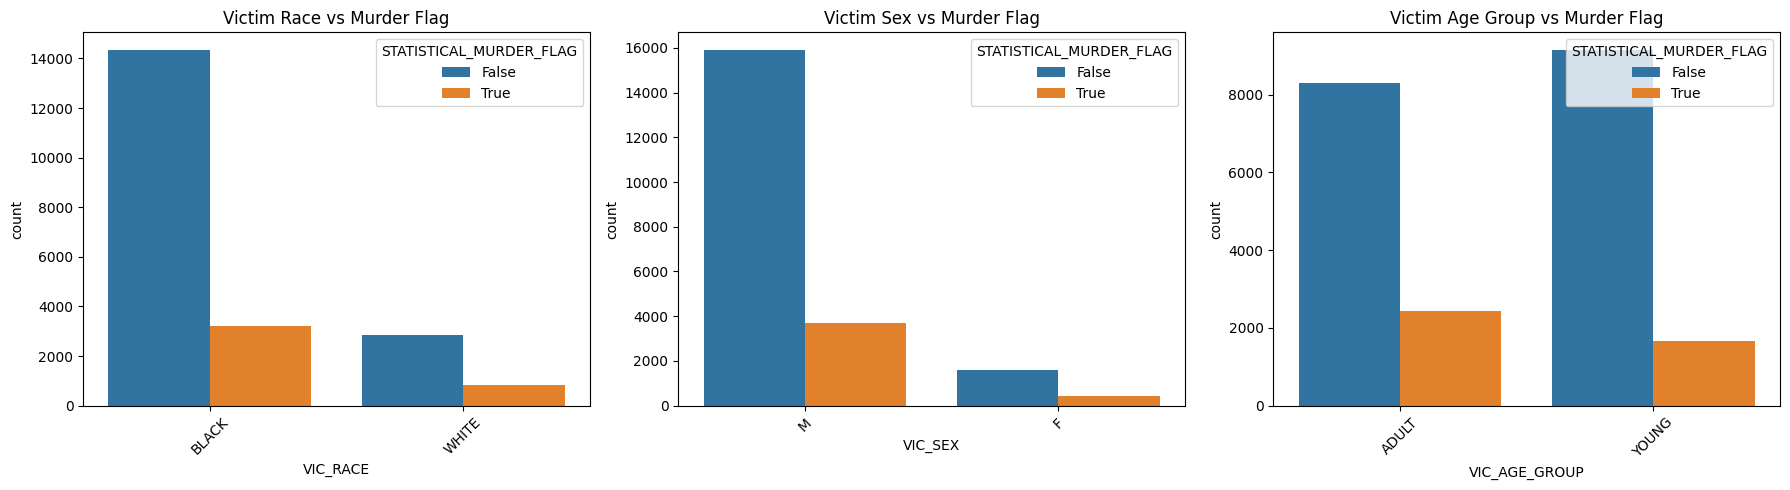

In [19]:
# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# First plot - Race
sns.countplot(ax=axes[0], x="VIC_RACE", hue="STATISTICAL_MURDER_FLAG", data=race_data)
axes[0].set_title("Victim Race vs Murder Flag")
axes[0].tick_params(axis='x', rotation=45)

# Second plot - Sex
sns.countplot(ax=axes[1], x="VIC_SEX", hue="STATISTICAL_MURDER_FLAG", data=sex_data)
axes[1].set_title("Victim Sex vs Murder Flag")
axes[1].tick_params(axis='x', rotation=45)

# Third plot - Age Group
sns.countplot(ax=axes[2], x="VIC_AGE_GROUP", hue="STATISTICAL_MURDER_FLAG", data=age_data)
axes[2].set_title("Victim Age Group vs Murder Flag")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

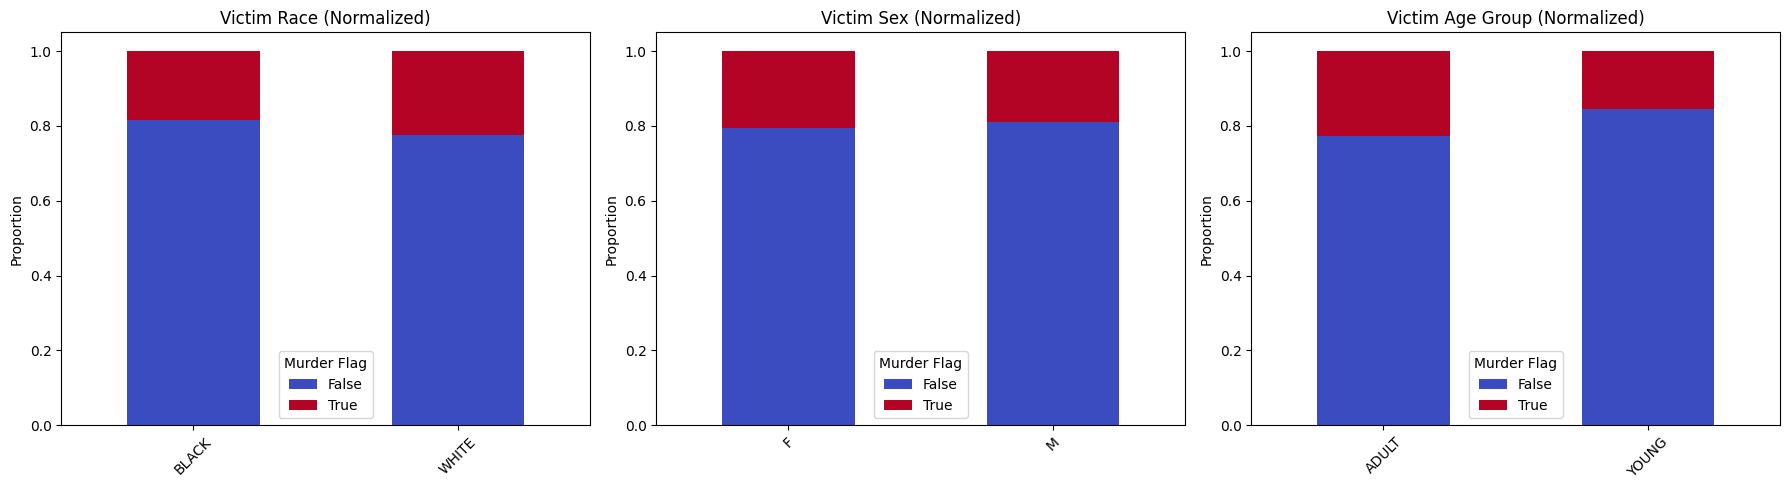

In [21]:
# Normalize and prepare data for Race
race_norm = (
    race_data.groupby(['VIC_RACE', 'STATISTICAL_MURDER_FLAG'])
    .size()
    .unstack(fill_value=0)
)
race_norm = race_norm.div(race_norm.sum(axis=1), axis=0)

# Normalize and prepare data for Sex
sex_norm = (
    sex_data.groupby(['VIC_SEX', 'STATISTICAL_MURDER_FLAG'])
    .size()
    .unstack(fill_value=0)
)
sex_norm = sex_norm.div(sex_norm.sum(axis=1), axis=0)

# Normalize and prepare data for Age Group
age_norm = (
    age_data.groupby(['VIC_AGE_GROUP', 'STATISTICAL_MURDER_FLAG'])
    .size()
    .unstack(fill_value=0)
)
age_norm = age_norm.div(age_norm.sum(axis=1), axis=0)

# Plot side-by-side stacked bar charts
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Race
race_norm.plot(kind='bar', stacked=True, ax=axes[0], colormap='coolwarm')
axes[0].set_title("Victim Race (Normalized)")

# Sex
sex_norm.plot(kind='bar', stacked=True, ax=axes[1], colormap='coolwarm')
axes[1].set_title("Victim Sex (Normalized)")

# Age Group
age_norm.plot(kind='bar', stacked=True, ax=axes[2], colormap='coolwarm')
axes[2].set_title("Victim Age Group (Normalized)")

# Layout adjustment
for ax in axes:
    ax.legend(title="Murder Flag")
    ax.set_ylabel("Proportion")
    ax.set_xlabel("")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='OCCUR_TIME', ylabel='count'>

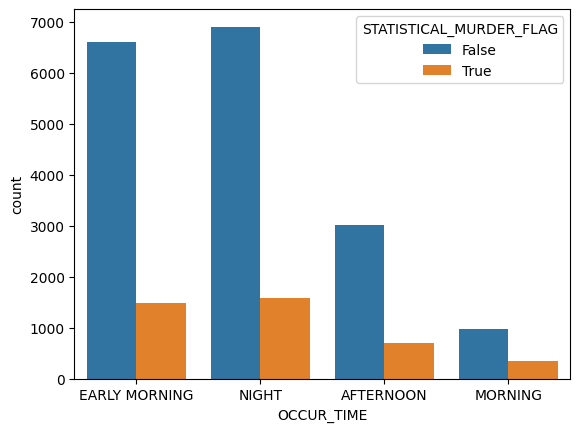

In [22]:
sns.countplot(x="OCCUR_TIME", hue="STATISTICAL_MURDER_FLAG", data=data)

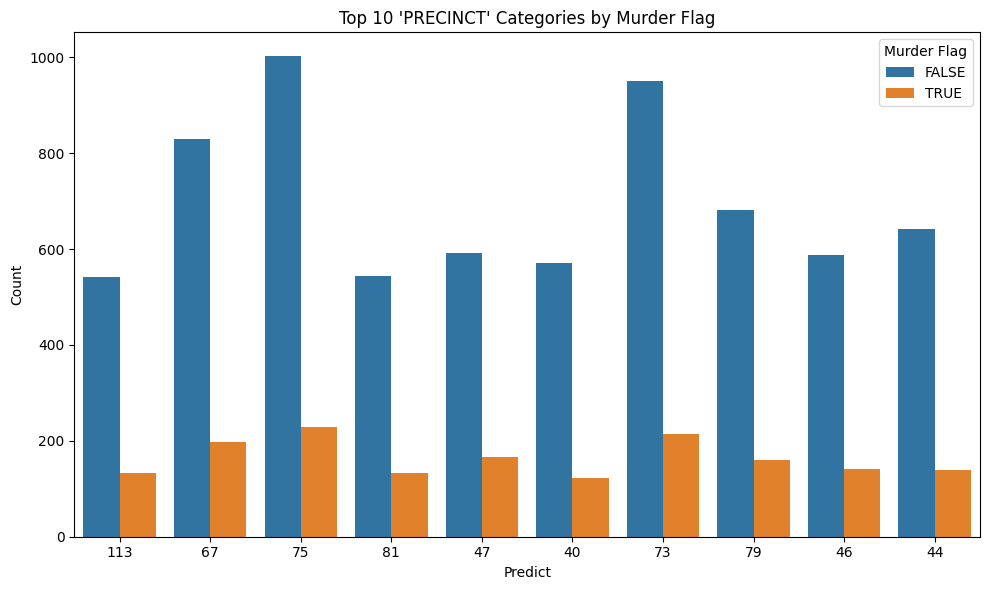

In [109]:
# Count top 10 values in 'PRECINCT'
top_values = data['PRECINCT'].value_counts().nlargest(10).index

# Step 2: Filter to only top 5
df_top_values = data[data['PRECINCT'].isin(top_values)]

# Step 3: Create grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_values, x='PRECINCT', hue='STATISTICAL_MURDER_FLAG')

plt.title("Top 10 'PRECINCT' Categories by Murder Flag")
plt.xlabel("Predict")
plt.ylabel("Count")
plt.legend(title='Murder Flag', labels=['FALSE', 'TRUE'])  # adjust labels if 0/1
plt.tight_layout()
plt.show()

<Axes: xlabel='BORO', ylabel='count'>

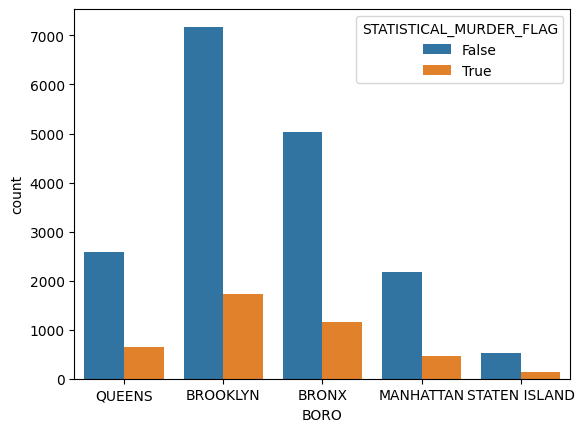

In [23]:
sns.countplot(x="BORO", hue="STATISTICAL_MURDER_FLAG", data=data)

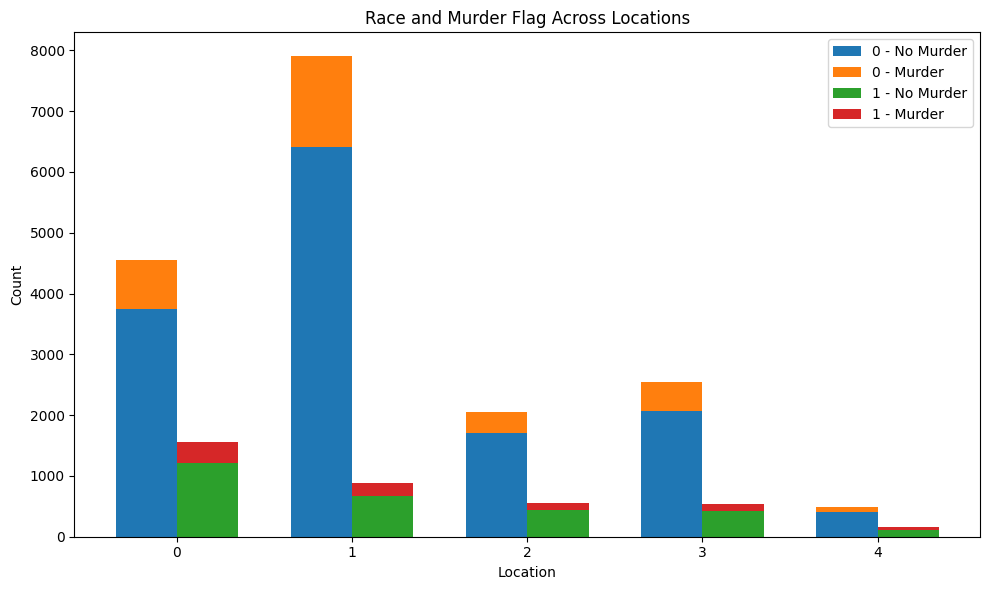

In [102]:
# Sample data frame: df has columns ['location', 'race', 'STATISTICAL_MURDER_FLAG']
# Step 1: Group and count
grouped = race_data.groupby(['BORO', 'VIC_RACE', 'STATISTICAL_MURDER_FLAG']).size().reset_index(name='count')

# Step 2: Pivot for stacked bars
pivot_df = grouped.pivot_table(index=['BORO', 'VIC_RACE'], columns='STATISTICAL_MURDER_FLAG', values='count', fill_value=0).reset_index()

# Step 3: Plot
locations = pivot_df['BORO'].unique()
races = pivot_df['VIC_RACE'].unique()
murder_flags = [0, 1]  # Assuming 0 = No, 1 = Yes

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # width of each bar group

for i, race in enumerate(races):
    subset = pivot_df[pivot_df['VIC_RACE'] == race]
    x = [j + i * width for j in range(len(locations))]
    ax.bar(x, subset[0], width, label=f'{race} - No Murder')
    ax.bar(x, subset[1], width, bottom=subset[0], label=f'{race} - Murder')

# Adjust x ticks
x_labels = [loc for loc in locations]
x_pos = [j + width / 2 for j in range(len(locations))]
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)

ax.set_xlabel("Location")
ax.set_ylabel("Count")
ax.set_title("Race and Murder Flag Across Locations")
ax.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='VIC_AGE_GROUP', ylabel='count'>

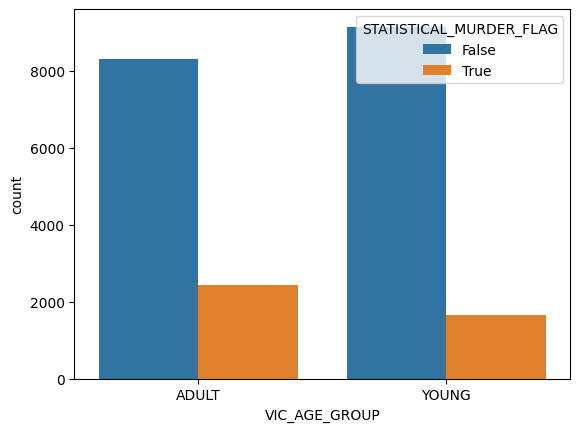

In [24]:
sns.countplot(x="VIC_AGE_GROUP", hue="STATISTICAL_MURDER_FLAG", data=age_data)

<Axes: xlabel='VIC_SEX', ylabel='count'>

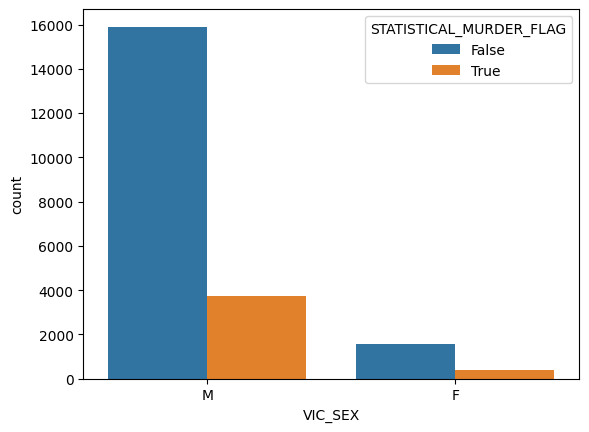

In [25]:
sns.countplot(x="VIC_SEX", hue="STATISTICAL_MURDER_FLAG", data=sex_data)

<Axes: xlabel='MONTH', ylabel='count'>

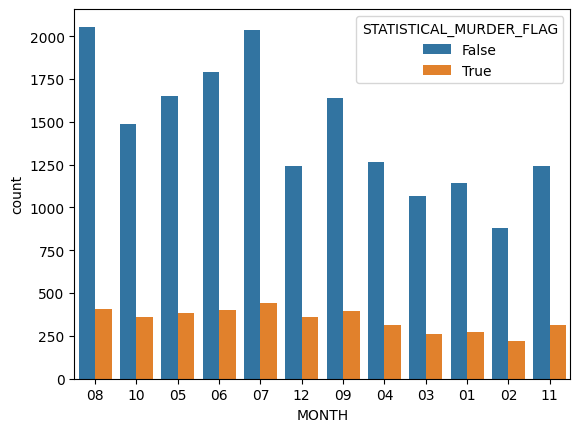

In [274]:
sns.countplot(x="MONTH", hue="STATISTICAL_MURDER_FLAG", data=data)

## Model Development

### RACE

In [26]:
print("Checking for null values")
print(race_data.isnull().sum())

Checking for null values
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
STATISTICAL_MURDER_FLAG    0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
MONTH                      0
dtype: int64


In [27]:
race_data = race_data.astype('category')
race_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21238 entries, 74146165 to 193694862
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OCCUR_TIME               21238 non-null  category
 1   BORO                     21238 non-null  category
 2   PRECINCT                 21238 non-null  category
 3   STATISTICAL_MURDER_FLAG  21238 non-null  category
 4   VIC_AGE_GROUP            21238 non-null  category
 5   VIC_SEX                  21238 non-null  category
 6   VIC_RACE                 21238 non-null  category
 7   MONTH                    21238 non-null  category
dtypes: category(8)
memory usage: 335.8 KB


In [28]:
columns = race_data.columns
for column in columns:
    race_data[column] = race_data[column].cat.codes
race_data.head()

,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH
INCIDENT_KEY,,,,,,,,
74146165,1,3,15,0,1,1,0,7
66928846,3,1,56,1,2,1,0,9
29114164,3,1,64,0,1,1,0,4
85180336,0,1,69,0,1,1,0,5
73405770,1,0,44,0,1,1,0,5


In [29]:
race_data["STATISTICAL_MURDER_FLAG"].value_counts()

STATISTICAL_MURDER_FLAG
0    17199
1     4039
Name: count, dtype: int64

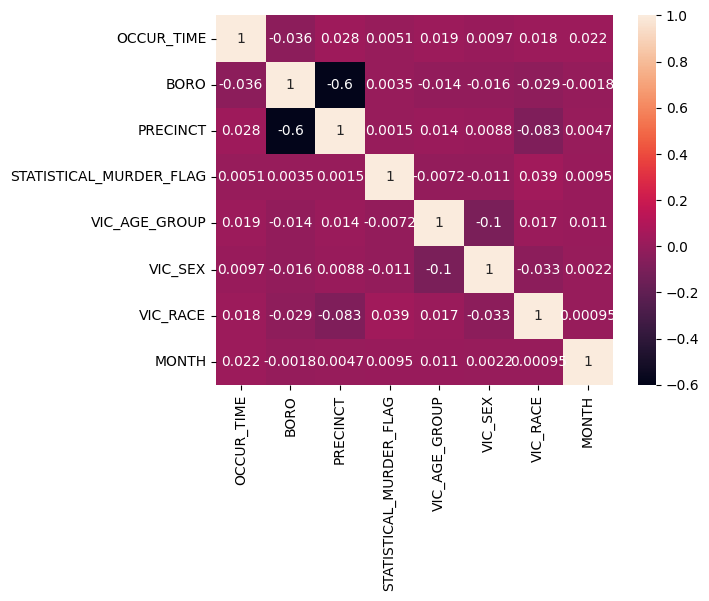

In [30]:
race_corr_matrix = race_data.corr()
sns.heatmap(race_corr_matrix, annot=True)
plt.show()

In [31]:
race_X = race_data.drop("STATISTICAL_MURDER_FLAG", axis=1)
race_Y = race_data["STATISTICAL_MURDER_FLAG"]
race_X.head()

,OCCUR_TIME,BORO,PRECINCT,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH
INCIDENT_KEY,,,,,,,
74146165,1,3,15,1,1,0,7
66928846,3,1,56,2,1,0,9
29114164,3,1,64,1,1,0,4
85180336,0,1,69,1,1,0,5
73405770,1,0,44,1,1,0,5


In [32]:
# Set up the undersampling method
undersampler = NearMiss(version=1, n_neighbors=3)

# Apply the transformation to the dataset
race_features, race_labels = undersampler.fit_resample(race_X, race_Y)

race_labels.value_counts()

STATISTICAL_MURDER_FLAG
0    4039
1    4039
Name: count, dtype: int64

In [33]:
RX_train, RX_test, RY_train, RY_test = train_test_split(race_features, race_labels, test_size = 0.2, stratify=race_labels, random_state=2)
print(race_features.shape, RX_train.shape, RX_test.shape)

(8078, 7) (6462, 7) (1616, 7)


In [34]:
race_rf = RandomForestClassifier(random_state = 42)
race_rf.fit(RX_train, RY_train)

RandomForestClassifier(random_state=42)

In [35]:
race_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [36]:
train_predict_Race=race_rf.predict(RX_train)
print("Accuracy on training data: ", metrics.accuracy_score(RY_train, train_predict_Race))
print("Precision on training data:", metrics.precision_score(RY_train, train_predict_Race))
print("Recall on training data:", metrics.recall_score(RY_train, train_predict_Race))

Accuracy on training data:  0.77669452181987
Precision on training data: 0.8536392405063291
Recall on training data: 0.6679046734757041


In [37]:
test_predict_Race=race_rf.predict(RX_test)
print("Accuracy on testing data: ", metrics.accuracy_score(RY_test, test_predict_Race))
print("Precision on testing data:", metrics.precision_score(RY_test, test_predict_Race))
print("Recall on testing data: ", metrics.recall_score(RY_test, test_predict_Race))

Accuracy on testing data:  0.6534653465346535
Precision on testing data: 0.7019543973941368
Recall on testing data:  0.5334158415841584


#### Hyperparameter for Random Forest

In [38]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 1100, 100)]
# Maximum number of levels in tree
max_depth = None #[int(x) for x in range(10, 60, 10) 'max_depth': max_depth,
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5] #[int(x) for x in range(2, 11)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5] #[int(x) for x in range(2, 11)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'min_samples_split': [2, 3, 4, 5],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [39]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
race_rand_search = RandomizedSearchCV(race_rf, param_distributions=random_grid, n_iter=100, cv=skf, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search object to the data
race_rand_search.fit(RX_train, RY_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [40]:
# Create a variable for the best model
race_best_rf = race_rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  race_rand_search.best_params_)

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 5}


In [41]:
train_predict_BT_Race=race_best_rf.predict(RX_train)
print("Accuracy on training data: ", metrics.accuracy_score(RY_train, train_predict_BT_Race))
print("Precision on training data:", metrics.precision_score(RY_train, train_predict_BT_Race))
print("Recall on training data:", metrics.recall_score(RY_train, train_predict_BT_Race))

Accuracy on training data:  0.7333642835035593
Precision on training data: 0.7675656493967353
Recall on training data: 0.669452181987001


In [42]:
test_predict_BT_Race=race_best_rf.predict(RX_test)
print("Accuracy on testing data: ", metrics.accuracy_score(RY_test, test_predict_BT_Race))
print("Precision on testing data:", metrics.precision_score(RY_test, test_predict_BT_Race))
print("Recall on testing data: ", metrics.recall_score(RY_test, test_predict_BT_Race))

Accuracy on testing data:  0.6800742574257426
Precision on testing data: 0.7040673211781207
Recall on testing data:  0.6212871287128713


RTN=597, RFP=211, RFN=306, RTP=502


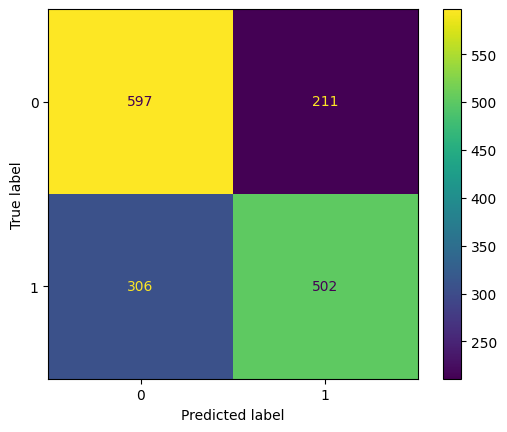

In [43]:
# Generate predictions with the best model
race_cm = metrics.confusion_matrix(RY_test, test_predict_BT_Race)
RTN, RFP, RFN, RTP = race_cm.ravel()
print("RTN={0}, RFP={1}, RFN={2}, RTP={3}".format(RTN, RFP, RFN, RTP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=race_cm)
disp.plot()
plt.show()

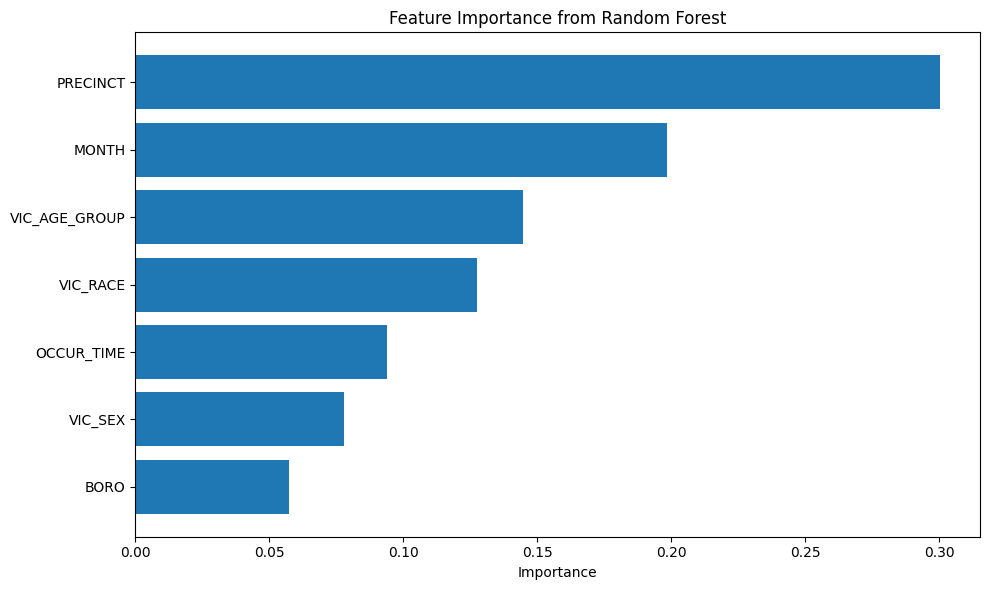

In [104]:
# Get feature importances
importances = race_best_rf.feature_importances_

# Convert to a DataFrame for easy viewing
feature_names = RX_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [44]:
PROTECTED = "VIC_RACE"
BLACK = 0 #Black
WHITE = 1 #White
vic_race_dist = RX_test[PROTECTED].value_counts()
print(vic_race_dist)
black_indices = np.where(RX_test[PROTECTED] == BLACK)[0]
white_indices = np.where(RX_test[PROTECTED] == WHITE)[0]

VIC_RACE
0    1384
1     232
Name: count, dtype: int64


In [45]:
Y_test_black = [RY_test.values[i] for i in black_indices]
Y_test_white = [RY_test.values[i] for i in white_indices]

In [46]:
Y_predict_black = [test_predict_BT_Race[i] for i in black_indices]
Y_predict_white = [test_predict_BT_Race[i] for i in white_indices]

TN_black=597, FP_black=150, FN_black=303, TP_black=334


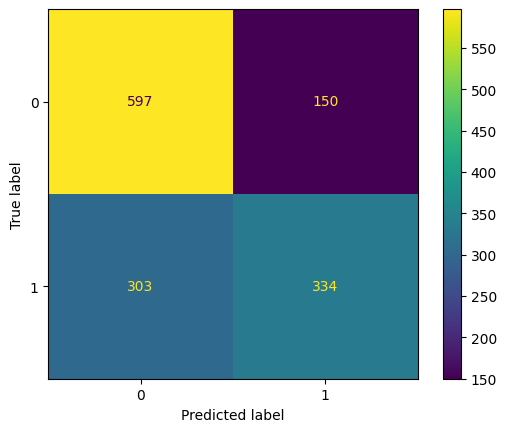

In [47]:
cm_black = metrics.confusion_matrix(Y_test_black, Y_predict_black)
TN_black, FP_black, FN_black, TP_black = cm_black.ravel()
print("TN_black={0}, FP_black={1}, FN_black={2}, TP_black={3}".format(TN_black, FP_black, FN_black, TP_black))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_black)
disp.plot()
plt.show()

In [48]:
print("Accuracy on black testing data: ", metrics.accuracy_score(Y_test_black, Y_predict_black))
print(f"Group Fairness of testing data: {(FP_black + TP_black) / (TN_black + FP_black + FN_black + TP_black)}")
print("Recall on black testing data: ", metrics.recall_score(Y_test_black, Y_predict_black))

Accuracy on black testing data:  0.6726878612716763
Group Fairness of testing data: 0.34971098265895956
Recall on black testing data:  0.5243328100470958


TN_white=0, FP_white=61, FN_white=3, TP_white=168


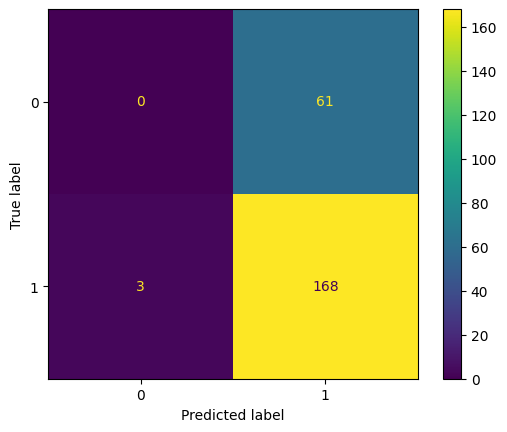

In [49]:
cm_white = metrics.confusion_matrix(Y_test_white, Y_predict_white)
TN_white, FP_white, FN_white, TP_white = cm_white.ravel()
print("TN_white={0}, FP_white={1}, FN_white={2}, TP_white={3}".format(TN_white, FP_white, FN_white, TP_white))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_white)
disp.plot()
plt.show()

In [50]:
print("Accuracy on white testing data: ", metrics.accuracy_score(Y_test_white, Y_predict_white))
print(f"Group Fairness of testing data: {(FP_white + TP_white) / (TN_white + FP_white + FN_white + TP_white)}")
print("Recall on white testing data: ", metrics.recall_score(Y_test_white, Y_predict_white))

Accuracy on white testing data:  0.7241379310344828
Group Fairness of testing data: 0.9870689655172413
Recall on white testing data:  0.9824561403508771


### SEX

In [51]:
print("Checking for null values")
print(sex_data.isnull().sum())

Checking for null values
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
STATISTICAL_MURDER_FLAG    0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
MONTH                      0
dtype: int64


In [52]:
sex_data = sex_data.astype('category')
sex_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21614 entries, 74146165 to 193694862
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OCCUR_TIME               21614 non-null  category
 1   BORO                     21614 non-null  category
 2   PRECINCT                 21614 non-null  category
 3   STATISTICAL_MURDER_FLAG  21614 non-null  category
 4   VIC_AGE_GROUP            21614 non-null  category
 5   VIC_SEX                  21614 non-null  category
 6   VIC_RACE                 21614 non-null  category
 7   MONTH                    21614 non-null  category
dtypes: category(8)
memory usage: 341.9 KB


In [53]:
columns = sex_data.columns
for column in columns:
    sex_data[column] = sex_data[column].cat.codes
sex_data.head()

,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH
INCIDENT_KEY,,,,,,,,
74146165,1,3,15,0,1,1,2,7
66928846,3,1,56,1,2,1,2,9
29114164,3,1,64,0,1,1,2,4
85180336,0,1,69,0,1,1,2,5
73405770,1,0,44,0,1,1,2,5


In [54]:
sex_data["STATISTICAL_MURDER_FLAG"].value_counts()

STATISTICAL_MURDER_FLAG
0    17488
1     4126
Name: count, dtype: int64

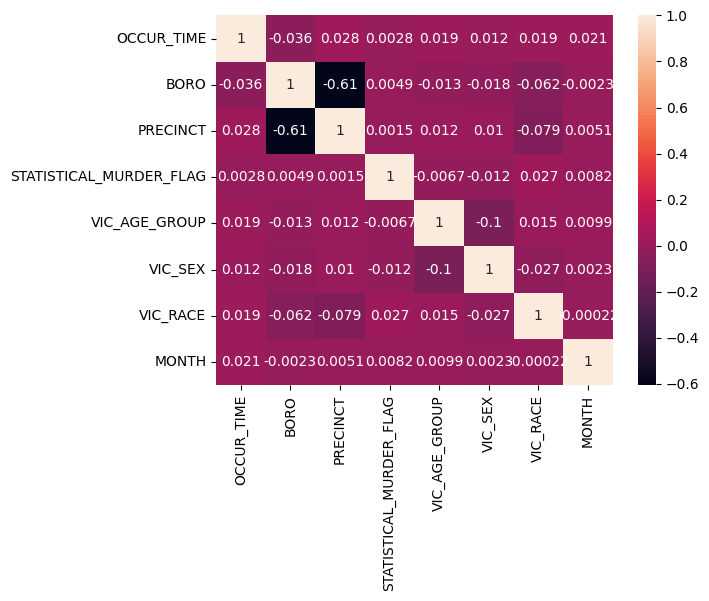

In [55]:
sex_corr_matrix = sex_data.corr()
sns.heatmap(sex_corr_matrix, annot=True)
plt.show()

In [56]:
sex_X = sex_data.drop("STATISTICAL_MURDER_FLAG", axis=1)
sex_Y = sex_data["STATISTICAL_MURDER_FLAG"]
sex_X.head()

,OCCUR_TIME,BORO,PRECINCT,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH
INCIDENT_KEY,,,,,,,
74146165,1,3,15,1,1,2,7
66928846,3,1,56,2,1,2,9
29114164,3,1,64,1,1,2,4
85180336,0,1,69,1,1,2,5
73405770,1,0,44,1,1,2,5


In [57]:
# Set up the undersampling method
undersampler = NearMiss(version=1, n_neighbors=3)

# Apply the transformation to the dataset
sex_features, sex_labels = undersampler.fit_resample(sex_X, sex_Y)

sex_labels.value_counts()

STATISTICAL_MURDER_FLAG
0    4126
1    4126
Name: count, dtype: int64

In [58]:
SX_train, SX_test, SY_train, SY_test = train_test_split(sex_features, sex_labels, test_size = 0.2, stratify=sex_labels, random_state=2)
print(sex_features.shape, SX_train.shape, SX_test.shape)

(8252, 7) (6601, 7) (1651, 7)


In [59]:
sex_rf = RandomForestClassifier(random_state = 42)
sex_rf.fit(SX_train, SY_train)

RandomForestClassifier(random_state=42)

In [60]:
sex_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [61]:
train_predict_Sex=sex_rf.predict(SX_train)
print("Accuracy on training data: ", metrics.accuracy_score(SY_train, train_predict_Sex))
print("Precision on training data:", metrics.precision_score(SY_train, train_predict_Sex))
print("Recall on training data:", metrics.recall_score(SY_train, train_predict_Sex))

Accuracy on training data:  0.773670655961218
Precision on training data: 0.8547310561444837
Recall on training data: 0.659497122084217


In [62]:
test_predict_Sex=sex_rf.predict(SX_test)
print("Accuracy on testing data: ", metrics.accuracy_score(SY_test, test_predict_Sex))
print("Precision on testing data:", metrics.precision_score(SY_test, test_predict_Sex))
print("Recall on testing data: ", metrics.recall_score(SY_test, test_predict_Sex))

Accuracy on testing data:  0.6517262265293762
Precision on testing data: 0.6971608832807571
Recall on testing data:  0.5357575757575758


#### Hyperparameter for Random Forest

In [63]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 1100, 100)]
# Maximum number of levels in tree
max_depth = None #[int(x) for x in range(10, 60, 10) 'max_depth': max_depth,
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5] #[int(x) for x in range(2, 11)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5] #[int(x) for x in range(2, 11)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'min_samples_split': [2, 3, 4, 5],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [64]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sex_rand_search = RandomizedSearchCV(sex_rf, param_distributions=random_grid, n_iter=100, cv=skf, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search object to the data
sex_rand_search.fit(SX_train, SY_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [65]:
# Create a variable for the best model
sex_best_rf = sex_rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  sex_rand_search.best_params_)

Best hyperparameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 5}


In [66]:
train_predict_BT_Sex=sex_best_rf.predict(SX_train)
print("Accuracy on training data: ", metrics.accuracy_score(SY_train, train_predict_BT_Sex))
print("Precision on training data:", metrics.precision_score(SY_train, train_predict_BT_Sex))
print("Recall on training data:", metrics.recall_score(SY_train, train_predict_BT_Sex))

Accuracy on training data:  0.7332222390546886
Precision on training data: 0.7720848056537103
Recall on training data: 0.6619206301120872


In [67]:
test_predict_BT_Sex=sex_best_rf.predict(SX_test)
print("Accuracy on testing data: ", metrics.accuracy_score(SY_test, test_predict_BT_Sex))
print("Precision on testing data:", metrics.precision_score(SY_test, test_predict_BT_Sex))
print("Recall on testing data: ", metrics.recall_score(SY_test, test_predict_BT_Sex))

Accuracy on testing data:  0.6789824348879467
Precision on testing data: 0.7062937062937062
Recall on testing data:  0.6121212121212121


STN=616, SFP=210, SFN=320, STP=505


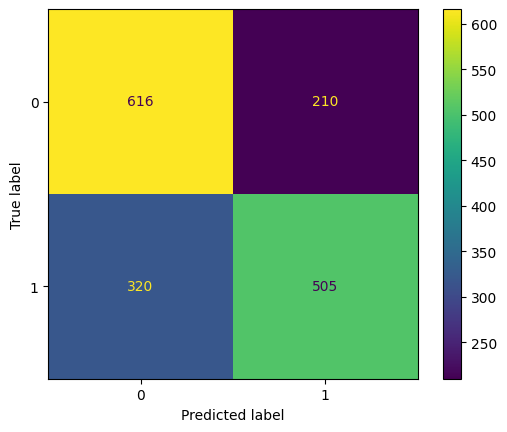

In [68]:
# Generate predictions with the best model
sex_cm = metrics.confusion_matrix(SY_test, test_predict_BT_Sex)
STN, SFP, SFN, STP = sex_cm.ravel()
print("STN={0}, SFP={1}, SFN={2}, STP={3}".format(STN, SFP, SFN, STP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=sex_cm)
disp.plot()
plt.show()

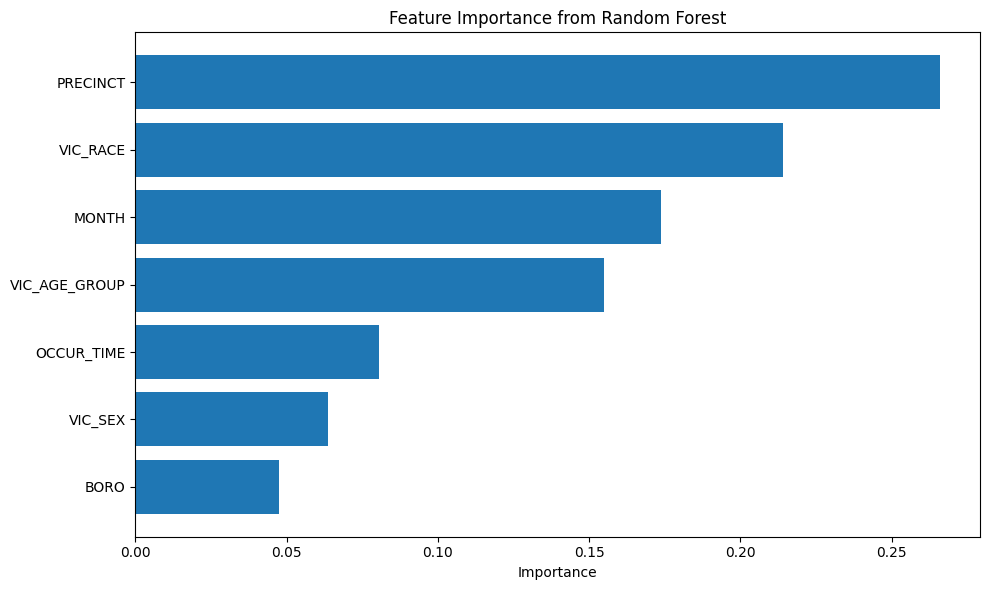

In [105]:
# Get feature importances
importances = sex_best_rf.feature_importances_

# Convert to a DataFrame for easy viewing
feature_names = SX_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [69]:
PROTECTED = "VIC_SEX"
MEN = 1 #male
WOMEN = 0 #women
gender_dist = SX_test[PROTECTED].value_counts()
print(gender_dist)
men_indices = np.where(SX_test[PROTECTED] == MEN)[0]
women_indices = np.where(SX_test[PROTECTED] == WOMEN)[0]

VIC_SEX
1    1542
0     109
Name: count, dtype: int64


In [70]:
Y_test_m = [SY_test.values[i] for i in men_indices]
Y_test_f = [SY_test.values[i] for i in women_indices]

In [71]:
Y_predict_m = [test_predict_BT_Sex[i] for i in men_indices]
Y_predict_f = [test_predict_BT_Sex[i] for i in women_indices]

TN_m=616, FP_m=191, FN_m=320, TP_m=415


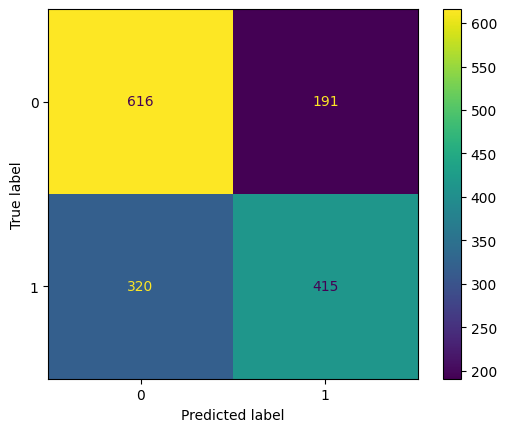

In [72]:
cm_m = metrics.confusion_matrix(Y_test_m, Y_predict_m)
TN_m, FP_m, FN_m, TP_m = cm_m.ravel()
print("TN_m={0}, FP_m={1}, FN_m={2}, TP_m={3}".format(TN_m, FP_m, FN_m, TP_m))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp.plot()
plt.show()

In [73]:
print("Accuracy on men testing data: ", metrics.accuracy_score(Y_test_m, Y_predict_m))
print(f"Group Fairness of testing data: {(FP_m + TP_m) / (TN_m + FP_m + FN_m + TP_m)}")
print("Recall on men testing data: ", metrics.recall_score(Y_test_m, Y_predict_m))

Accuracy on men testing data:  0.6686121919584954
Group Fairness of testing data: 0.39299610894941633
Recall on men testing data:  0.564625850340136


TN_f=0, FP_f=19, FN_f=0, TP_f=90


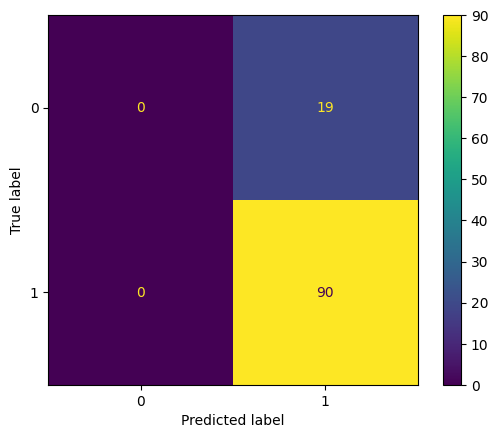

In [74]:
cm_f = metrics.confusion_matrix(Y_test_f, Y_predict_f)
TN_f, FP_f, FN_f, TP_f = cm_f.ravel()
print("TN_f={0}, FP_f={1}, FN_f={2}, TP_f={3}".format(TN_f, FP_f, FN_f, TP_f))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp.plot()
plt.show()

In [75]:
print("Accuracy on women testing data: ", metrics.accuracy_score(Y_test_f, Y_predict_f))
print(f"Group Fairness of testing data: {(FP_f + TP_f) / (TN_f + FP_f + FN_f + TP_f)}")
print("Recall on women testing data: ", metrics.recall_score(Y_test_f, Y_predict_f))

Accuracy on women testing data:  0.8256880733944955
Group Fairness of testing data: 1.0
Recall on women testing data:  1.0


### AGE GROUP

In [76]:
print("Checking for null values")
print(age_data.isnull().sum())

Checking for null values
OCCUR_TIME                 0
BORO                       0
PRECINCT                   0
STATISTICAL_MURDER_FLAG    0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
MONTH                      0
dtype: int64


In [77]:
age_data = age_data.astype('category')
age_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21568 entries, 74146165 to 193694862
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OCCUR_TIME               21568 non-null  category
 1   BORO                     21568 non-null  category
 2   PRECINCT                 21568 non-null  category
 3   STATISTICAL_MURDER_FLAG  21568 non-null  category
 4   VIC_AGE_GROUP            21568 non-null  category
 5   VIC_SEX                  21568 non-null  category
 6   VIC_RACE                 21568 non-null  category
 7   MONTH                    21568 non-null  category
dtypes: category(8)
memory usage: 341.1 KB


In [78]:
columns = age_data.columns
for column in columns:
    age_data[column] = age_data[column].cat.codes
age_data.head()

,OCCUR_TIME,BORO,PRECINCT,STATISTICAL_MURDER_FLAG,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH
INCIDENT_KEY,,,,,,,,
74146165,1,3,15,0,0,1,2,7
66928846,3,1,56,1,0,1,2,9
29114164,3,1,64,0,0,1,2,4
85180336,0,1,69,0,0,1,2,5
73405770,1,0,44,0,0,1,2,5


In [79]:
age_data["STATISTICAL_MURDER_FLAG"].value_counts()

STATISTICAL_MURDER_FLAG
0    17456
1     4112
Name: count, dtype: int64

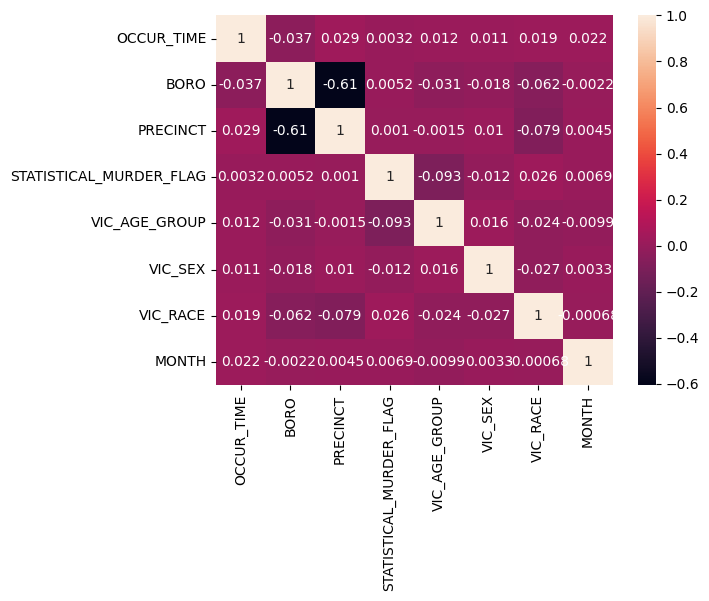

In [80]:
age_corr_matrix = age_data.corr()
sns.heatmap(age_corr_matrix, annot=True)
plt.show()

In [81]:
age_X = age_data.drop("STATISTICAL_MURDER_FLAG", axis=1)
age_Y = age_data["STATISTICAL_MURDER_FLAG"]
age_X.head()

,OCCUR_TIME,BORO,PRECINCT,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,MONTH
INCIDENT_KEY,,,,,,,
74146165,1,3,15,0,1,2,7
66928846,3,1,56,0,1,2,9
29114164,3,1,64,0,1,2,4
85180336,0,1,69,0,1,2,5
73405770,1,0,44,0,1,2,5


In [82]:
# Set up the undersampling method
undersampler = NearMiss(version=1, n_neighbors=3)

# Apply the transformation to the dataset
age_features, age_labels = undersampler.fit_resample(age_X, age_Y)

age_labels.value_counts()

STATISTICAL_MURDER_FLAG
0    4112
1    4112
Name: count, dtype: int64

In [83]:
AX_train, AX_test, AY_train, AY_test = train_test_split(age_features, age_labels, test_size = 0.2, stratify=age_labels, random_state=2)
print(age_features.shape, AX_train.shape, AX_test.shape)

(8224, 7) (6579, 7) (1645, 7)


In [84]:
age_rf = RandomForestClassifier(random_state = 42)
age_rf.fit(AX_train, AY_train)

RandomForestClassifier(random_state=42)

In [85]:
age_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [86]:
train_predict_Age=age_rf.predict(AX_train)
print("Accuracy on training data: ", metrics.accuracy_score(AY_train, train_predict_Age))
print("Precision on training data:", metrics.precision_score(AY_train, train_predict_Age))
print("Recall on training data:", metrics.recall_score(AY_train, train_predict_Age))

Accuracy on training data:  0.7963216294269646
Precision on training data: 0.9012345679012346
Recall on training data: 0.6656534954407295


In [87]:
test_predict_Age=age_rf.predict(AX_test)
print("Accuracy on testing data: ", metrics.accuracy_score(AY_test, test_predict_Age))
print("Precision on testing data:", metrics.precision_score(AY_test, test_predict_Age))
print("Recall on testing data: ", metrics.recall_score(AY_test, test_predict_Age))

Accuracy on testing data:  0.715501519756839
Precision on testing data: 0.7989864864864865
Recall on testing data:  0.5754257907542579


#### Hyperparameter for Random Forest

In [88]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 1100, 100)]
# Maximum number of levels in tree
max_depth = None #[int(x) for x in range(10, 60, 10) 'max_depth': max_depth,
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5] #[int(x) for x in range(2, 11)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5] #[int(x) for x in range(2, 11)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'min_samples_split': [2, 3, 4, 5],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [89]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
age_rand_search = RandomizedSearchCV(age_rf, param_distributions=random_grid, n_iter=200, cv=skf, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search object to the data
age_rand_search.fit(AX_train, AY_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [90]:
# Create a variable for the best model
age_best_rf = age_rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  age_rand_search.best_params_)

Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [91]:
train_predict_BT_Age=age_best_rf.predict(AX_train)
print("Accuracy on training data: ", metrics.accuracy_score(AY_train, train_predict_BT_Age))
print("Precision on training data:", metrics.precision_score(AY_train, train_predict_BT_Age))
print("Recall on training data:", metrics.recall_score(AY_train, train_predict_BT_Age))

Accuracy on training data:  0.7963216294269646
Precision on training data: 0.8963414634146342
Recall on training data: 0.6702127659574468


In [92]:
test_predict_BT_Age=age_best_rf.predict(AX_test)
print("Accuracy on testing data: ", metrics.accuracy_score(AY_test, test_predict_BT_Age))
print("Precision on testing data:", metrics.precision_score(AY_test, test_predict_BT_Age))
print("Recall on testing data: ", metrics.recall_score(AY_test, test_predict_BT_Age))

Accuracy on testing data:  0.7185410334346505
Precision on testing data: 0.8006700167504187
Recall on testing data:  0.5815085158150851


ATN=704, AFP=119, AFN=344, ATP=478


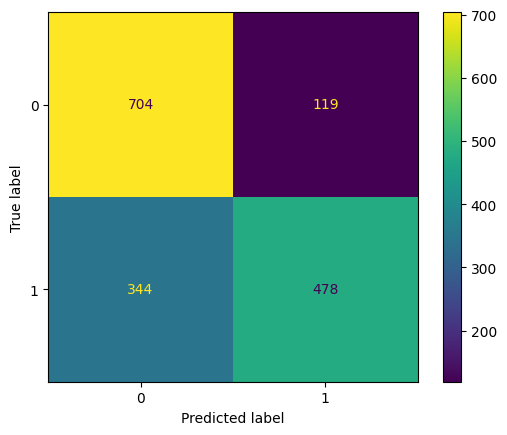

In [93]:
# Generate predictions with the best model
age_cm = metrics.confusion_matrix(AY_test, test_predict_BT_Age)
ATN, AFP, AFN, ATP = age_cm.ravel()
print("ATN={0}, AFP={1}, AFN={2}, ATP={3}".format(ATN, AFP, AFN, ATP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=age_cm)
disp.plot()
plt.show()

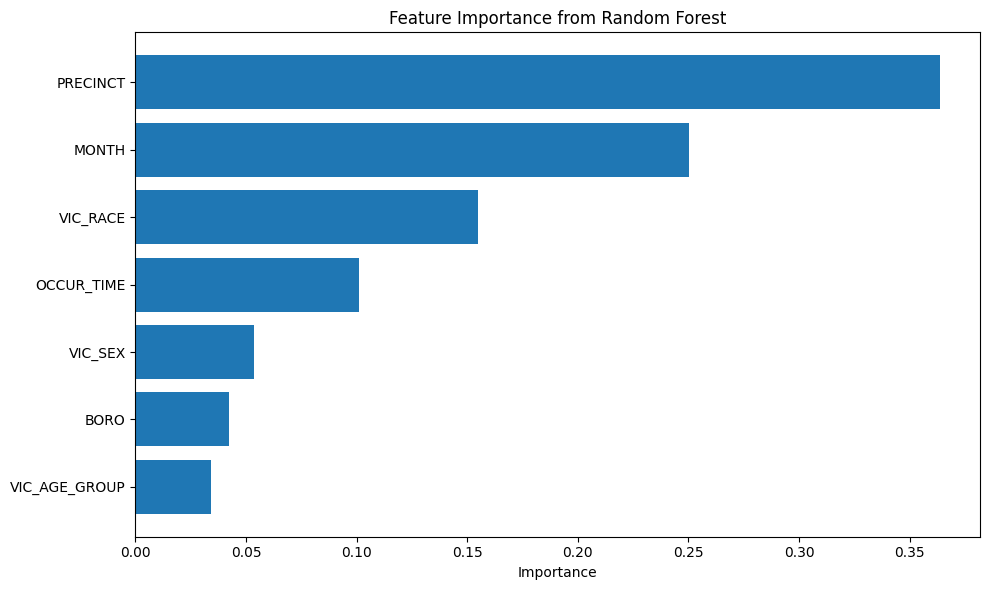

In [106]:
# Get feature importances
importances = age_best_rf.feature_importances_

# Convert to a DataFrame for easy viewing
feature_names = AX_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [94]:
PROTECTED = "VIC_AGE_GROUP"
YOUNG = 1 #young
ADULT = 0 #old
age_dist = AX_test[PROTECTED].value_counts()
print(age_dist)
young_indices = np.where(AX_test[PROTECTED] == YOUNG)[0]
old_indices = np.where(AX_test[PROTECTED] == ADULT)[0]

VIC_AGE_GROUP
0    904
1    741
Name: count, dtype: int64


In [95]:
Y_test_young = [AY_test.values[i] for i in young_indices]
Y_test_adult = [AY_test.values[i] for i in old_indices]
Y_predict_young = [test_predict_BT_Age[i] for i in young_indices]
Y_predict_adult = [test_predict_BT_Age[i] for i in old_indices]

TN_young=352, FP_young=45, FN_young=163, TP_young=181


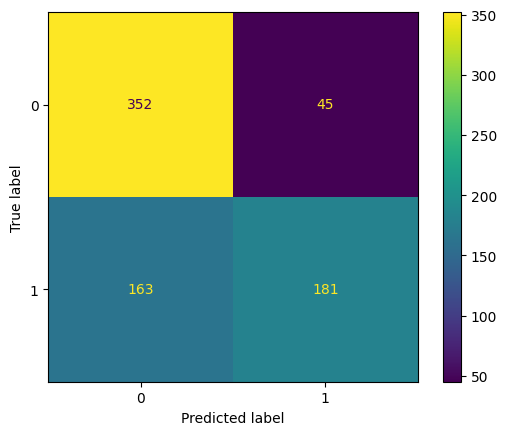

In [96]:
cm_young = metrics.confusion_matrix(Y_test_young, Y_predict_young)
TN_young, FP_young, FN_young, TP_young = cm_young.ravel()
print("TN_young={0}, FP_young={1}, FN_young={2}, TP_young={3}".format(TN_young, FP_young, FN_young, TP_young))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_young)
disp.plot()
plt.show()

In [97]:
print("Accuracy on Young testing data: ", metrics.accuracy_score(Y_test_young, Y_predict_young))
print(f"Group Fairness of testing data: {(FP_young + TP_young) / (TN_young + FP_young + FN_young + TP_young)}")
print("Recall on Young testing data: ", metrics.recall_score(Y_test_young, Y_predict_young))

Accuracy on Young testing data:  0.7192982456140351
Group Fairness of testing data: 0.3049932523616734
Recall on Young testing data:  0.5261627906976745


TN_adult=352, FP_adult=74, FN_adult=181, TP_adult=297


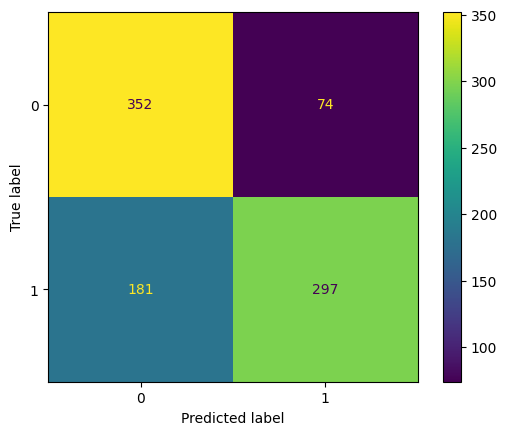

In [98]:
cm_adult = metrics.confusion_matrix(Y_test_adult, Y_predict_adult)
TN_adult, FP_adult, FN_adult, TP_adult = cm_adult.ravel()
print("TN_adult={0}, FP_adult={1}, FN_adult={2}, TP_adult={3}".format(TN_adult, FP_adult, FN_adult, TP_adult))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_adult)
disp.plot()
plt.show()

In [99]:
print("Accuracy on Adult testing data: ", metrics.accuracy_score(Y_test_adult, Y_predict_adult))
print(f"Group Fairness of testing data: {(FP_adult + TP_adult) / (TN_adult + FP_adult + FN_adult + TP_adult)}")
print("Recall on Adult testing data: ", metrics.recall_score(Y_test_adult, Y_predict_adult))

Accuracy on Adult testing data:  0.7179203539823009
Group Fairness of testing data: 0.4103982300884956
Recall on Adult testing data:  0.6213389121338913


#### Since the Hyper Parameter tunning for Random Forest was not working effectively, Train the model of other algorithms but the performances were poor so I reverted to using the base model for Random Forest. See the train models below

### Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression model
log_reg = LogisticRegression(random_state=42, solver='liblinear')  # Use 'liblinear' for small datasets
log_reg.fit(X_train_scaled, Y_train)

# Make predictions
train_pred = log_reg.predict(X_train_scaled)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred))

NameError: name 'X_train' is not defined

In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    "penalty": ["l1", "l2"],  # Regularization type
    "solver": ["liblinear", "saga"]  # Solvers that support L1 and L2
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Use GridSearchCV for exhaustive search (change to RandomizedSearchCV for faster results)
grid_search = GridSearchCV(
    log_reg, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring="accuracy", 
    verbose=2, 
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_scaled, Y_train)

# Best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.6386609009216093


### Naive Bayes

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naïve Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, Y_train)

# Make predictions
train_pred = nb_model.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred))

Accuracy on training data:  0.6284432064376354
Precision on training data: 0.7476133651551312
Recall on training data: 0.38780563293098114


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define hyperparameter grid
param_grid = {
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]  
    # Controls how much variance is added to avoid zero probabilities
}

# Initialize Gaussian Naïve Bayes model
nb_model = GaussianNB()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    nb_model, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring="accuracy", 
    verbose=2, 
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, Y_train)

# Best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'var_smoothing': 1e-05}
Best Accuracy: 0.6265897102521556


### SVM

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM model
svm_model = SVC(kernel="rbf", random_state=42)  # Default is RBF kernel

# Train the model
svm_model.fit(X_train_scaled, Y_train)

# Make predictions
train_pred = svm_model.predict(X_train_scaled)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred))

Accuracy on training data:  0.663571649644073
Precision on training data: 0.733127481252757
Recall on training data: 0.5143918291550603


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameter grid
param_grid = {
    "C": [0.1, 1, 10, 100],  # Regularization parameter
    "kernel": ["linear", "rbf", "poly", "sigmoid"],  # Different kernel types
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    "degree": [2, 3, 4]  # Only used for 'poly' kernel
}

# Initialize SVM model
svm_model = SVC(random_state=42)


grid_search = RandomizedSearchCV(
    svm_model, 
    param_grid, 
    cv=5,  # 5-fold cross-validation
    scoring="accuracy", 
    verbose=2, 
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train_scaled, Y_train)

# Best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 4, 'C': 10}
Best Accuracy: 0.6572298085188405


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=19, metric="euclidean", weights="distance")

# Train the model
knn.fit(X_train, Y_train)

# Make predictions
train_pred = knn.predict(X_train)

print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_pred))
print("Precision on training data:", metrics.precision_score(Y_train, train_pred))
print("Recall on training data:", metrics.recall_score(Y_train, train_pred))

Accuracy on training data:  0.77669452181987
Precision on training data: 0.9318840579710145
Recall on training data: 0.5970287836583101


In [ ]:
# Make predictions
test_pred = knn.predict(X_test)

print("Accuracy on training data: ", metrics.accuracy_score(Y_test, test_pred))
print("Precision on training data:", metrics.precision_score(Y_test, test_pred))
print("Recall on training data:", metrics.recall_score(Y_test, test_pred))

Accuracy on training data:  0.6089108910891089
Precision on training data: 0.7167487684729064
Recall on training data: 0.36014851485148514
